Import Dependency

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
import os

Load Cleaned Data

In [16]:
benin_df = pd.read_csv('../data/cleaned/benin_cleaned.csv')
sierraleone_df = pd.read_csv('../data/cleaned/sierraleone_cleaned.csv')
togo_df = pd.read_csv('../data/cleaned/togo_cleaned.csv')

# Add country column for identification
benin_df['Country'] = 'Benin'
sierraleone_df['Country'] = 'Sierra Leone'
togo_df['Country'] = 'Togo'

# Combine datasets
combined_df = pd.concat([benin_df, sierraleone_df, togo_df])

Metric Comparison

Boxplots for GHI, DNI, DHI

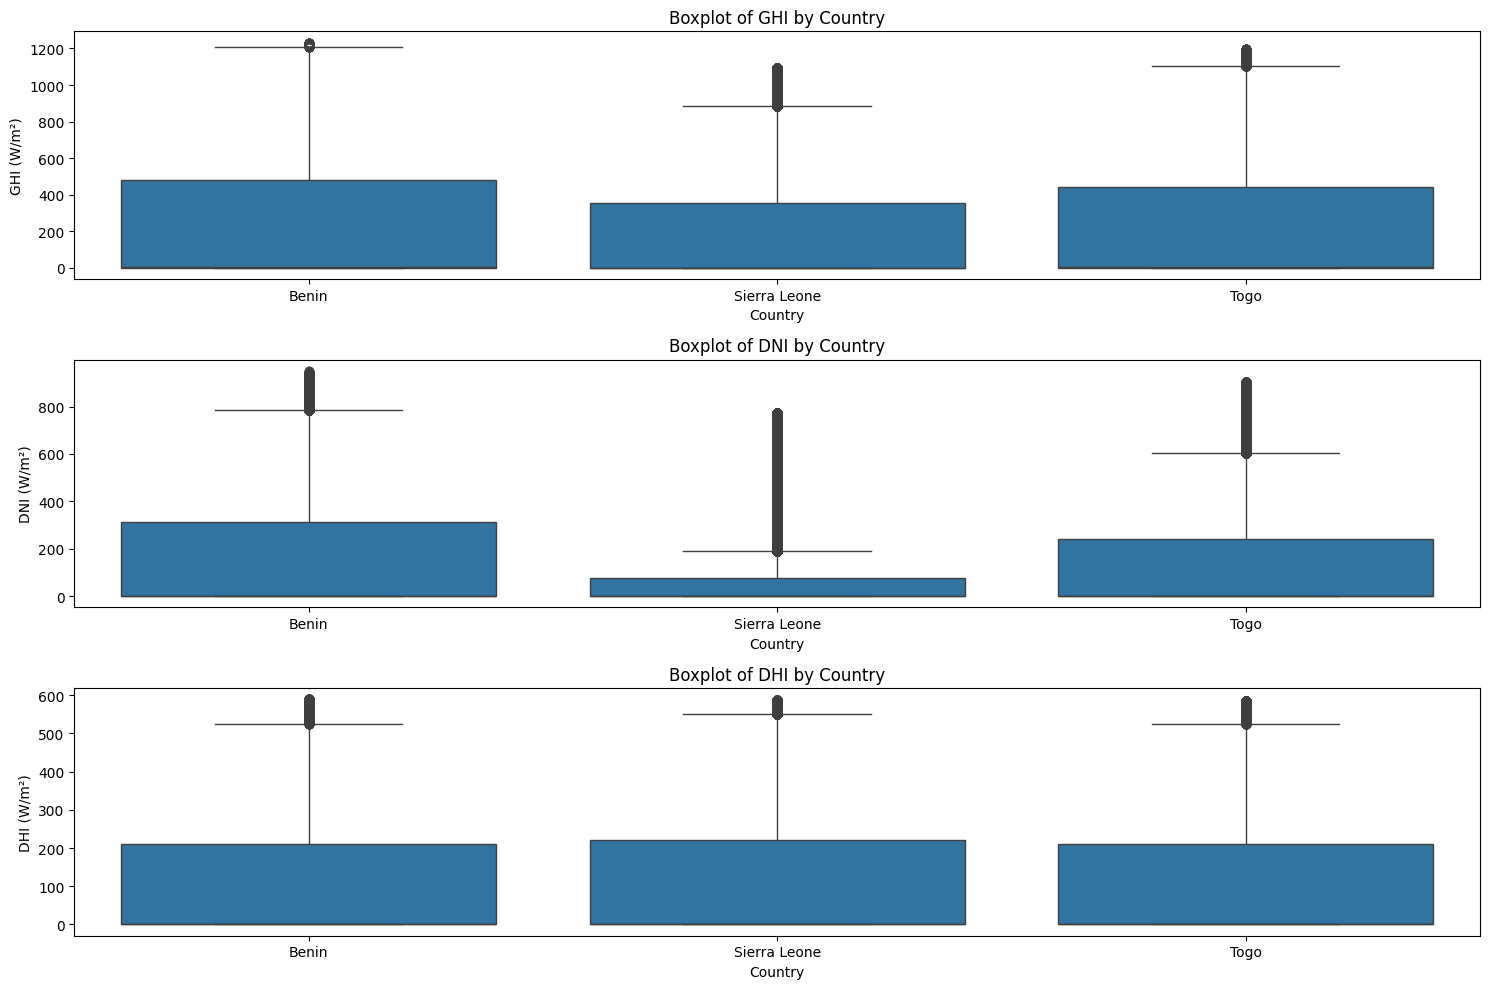

In [17]:
# Metric Comparison: Boxplots
plt.figure(figsize=(15, 10))

# Boxplot for GHI
plt.subplot(3, 1, 1)
sns.boxplot(x='Country', y='GHI', data=combined_df)
plt.title('Boxplot of GHI by Country')
plt.ylabel('GHI (W/m²)')

# Boxplot for DNI
plt.subplot(3, 1, 2)
sns.boxplot(x='Country', y='DNI', data=combined_df)
plt.title('Boxplot of DNI by Country')
plt.ylabel('DNI (W/m²)')

# Boxplot for DHI
plt.subplot(3, 1, 3)
sns.boxplot(x='Country', y='DHI', data=combined_df)
plt.title('Boxplot of DHI by Country')
plt.ylabel('DHI (W/m²)')

plt.tight_layout()
plt.savefig('notebooks/cross_country_boxplots.png')
plt.show()


Summary Table

In [18]:
# Summary Table: Mean, Median, Standard Deviation
summary_stats = combined_df.groupby('Country')[['GHI', 'DNI', 'DHI']].agg(['mean', 'median', 'std']).round(2)
print("Summary Statistics by Country:\n", summary_stats)


Summary Statistics by Country:
                  GHI                    DNI                    DHI         \
                mean median     std    mean median     std    mean median   
Country                                                                     
Benin         241.74    1.8  329.84  167.44    0.0  261.54  112.37    1.6   
Sierra Leone  198.69    0.3  289.29  104.66    0.0  201.60  112.42    0.0   
Togo          230.98    2.1  320.78  149.37    0.0  248.55  112.41    2.5   

                      
                 std  
Country               
Benin         151.49  
Sierra Leone  151.96  
Togo          151.29  


Statistical Testing (ANOVA)



In [19]:
# Statistical Testing: One-way ANOVA on GHI
ghi_benin = benin_df['GHI'].dropna()
ghi_sierraleone = sierraleone_df['GHI'].dropna()
ghi_togo = togo_df['GHI'].dropna()

f_stat, p_value = f_oneway(ghi_benin, ghi_sierraleone, ghi_togo)
print(f"One-way ANOVA p-value for GHI: {p_value:.4f}")


One-way ANOVA p-value for GHI: 0.0000


Bar Chart Ranking by Average GHI

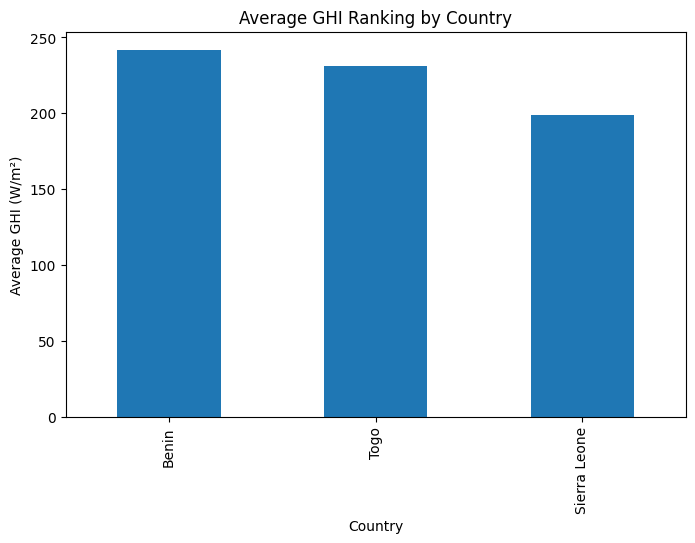

In [20]:

avg_ghi = combined_df.groupby('Country')['GHI'].mean().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
avg_ghi.plot(kind='bar')
plt.title('Average GHI Ranking by Country')
plt.ylabel('Average GHI (W/m²)')
plt.xlabel('Country')
plt.savefig('notebooks/ghi_ranking_bar.png')
plt.show()

Key Observations (Markdown)